In [4]:
### JUPYTER NOTEBOOK CONFIG
%load_ext autoreload
%autoreload 2
%matplotlib inline

working_dir = '/Users/hintont/Dev/Ridgecrest'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


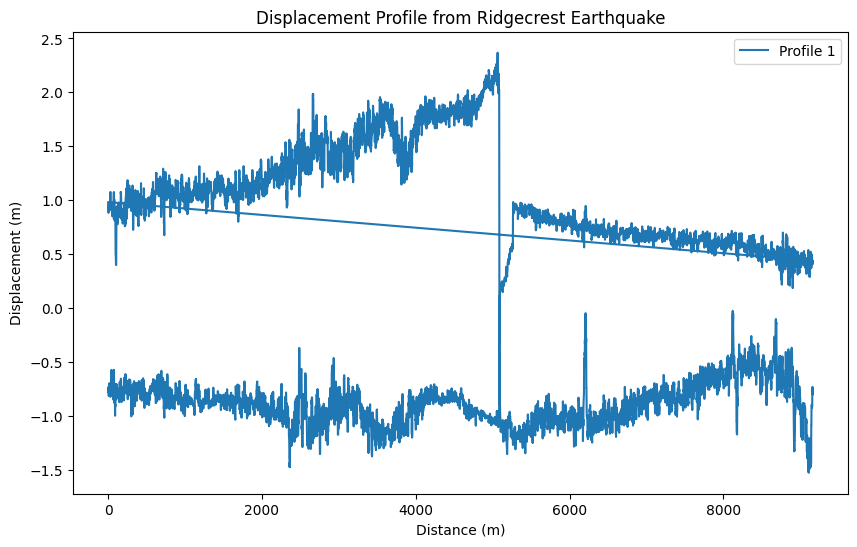

In [40]:
profile = pd.read_csv(f'{working_dir}/profiles/profile-4.csv')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(profile['distance'], profile['elevation'], label='Profile 1')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Displacement (m)')
ax.set_title('Displacement Profile from Ridgecrest Earthquake')
ax.legend()
plt.show()

In [ ]:
def read_profile_csv(file_path, dot_vector=None):
    data_csv = pd.read_csv(f'{working_dir}/profiles/profile-1.csv')
    data_ew = data_csv[data_csv['layer'].str.startswith('EW', na=False)].copy()
    data_ns = data_csv[data_csv['layer'].str.startswith('NS', na=False)]
    data_ew['NS'] = -data_ns['elevation'].values
    data_ew = data_ew.drop(columns=['layer'])
    data_ew = data_ew.rename(columns={'elevation': 'EW', 'distance': 'x'})
    neg_mask = data_ew['EW'] < 0
    midpoint = data_ew['x'].iloc[data_ew.loc[~neg_mask].index[0]]
    data_ew['x'] = data_ew['x'] - midpoint
    data_ew['displacement'] = np.sqrt(data_ew['EW'].to_numpy()**2 + data_ew['NS'].to_numpy()**2)
    data_ew.loc[neg_mask, 'displacement'] *= -1
    return data_ew
dot_vectors = [()]
profiles = [read_profile_csv(f'{working_dir}/profiles/profile-{i}.csv') for i in range(1, 10)]

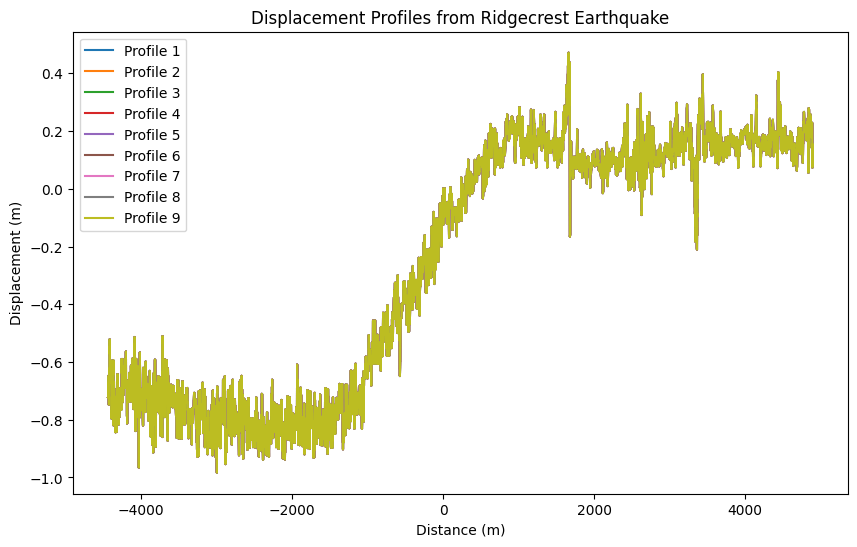

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
for i, profile in enumerate(profiles):
    ax.plot(profile['x'], profile['EW'], label=f'Profile {i+1}')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Displacement (m)')
ax.set_title('Displacement Profiles from Ridgecrest Earthquake')
ax.legend()
plt.show()

In [ ]:
#### DATA COVARIANCE MATRIX
Cd = noise_level**2 * np.eye(len(xs))